# Integration, Interpolation & Curve Fitting

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import *
from scipy.interpolate import interp1d, interp2d

# Integration

Integration

- define the function
- set the counts
- call quad()

In [3]:
def function(x):
    return 3*x**2+1.0

x_lower=0
x_upper=1

I,err=quad(function,x_lower,x_upper)
print("I: ",I)
print("error: ", err)

I:  2.0
error:  2.220446049250313e-14


# Interpolation

Interpolation to estimate data points between given set of discrete data points

In [4]:
#Generate some fake data
x_observed=np.linspace(0,10,20)
y_observed=np.cos(x_observed**2/8)

In [5]:
xx=np.linspace(0,10,1000)
yy=np.cos(xx**2/8)

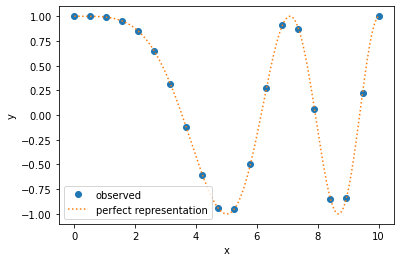

In [6]:
plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(xx,yy,':', label='exact representation')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

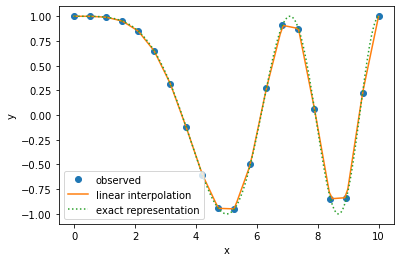

In [16]:
x_i = np.linspace(0,10,100)
#linear interpolation
f_lin=interp1d(x_observed,y_observed) # get interpolation function
y_i_lin=f_lin(x_i) # interpolate for y_i at x_i

plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(x_i,y_i_lin, '-',label='linear interpolation')
plt.plot(xx,yy,':', label='exact representation')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

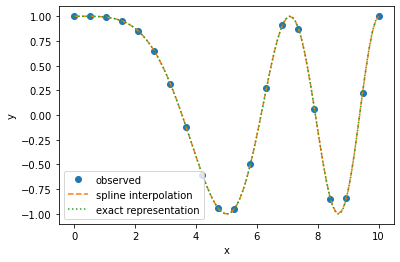

In [18]:
#spline interpolation
f_spl=interp1d(x_observed,y_observed, kind='cubic') # get interpolation function
y_i_spl=f_spl(x_i) # interpolate for y_i at x_i

plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(x_i,y_i_spl, '--',label='spline interpolation')
plt.plot(xx,yy,':', label='exact representation')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

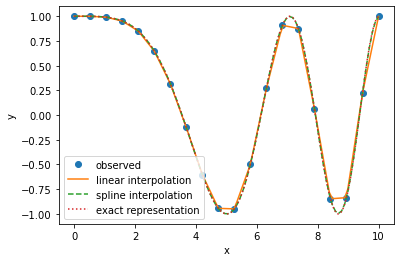

In [19]:
#comparison
plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(x_i,y_i_lin, '-',label='linear interpolation')
plt.plot(x_i,y_i_spl, '--',label='spline interpolation')
plt.plot(xx,yy,':', label='exact representation')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# Curve Fitting

Fitting measured data to a model function.

Polynomial fits: np.polyfit(x,y,polynomialorder) and np.polyval(px)

- set your given x and y 
- get a polyfit object
- evaluate the polynomal using polyval

(-2.0, 2.0)

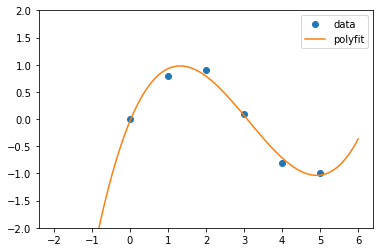

In [23]:
x_given=np.array([0,1,2,3,4,5])
y_given=np.array([0,0.8,0.9,0.1,-0.8,-1.0])

x_p=np.linspace(-2,6,100)
p_three=np.polyfit(x_given,y_given,3)
y_p=np.polyval(p_three,x_p)

plt.plot(x_given,y_given,'o')
plt.plot(x_p,y_p,'-')
plt.legend(['data','polyfit'],loc='best')
plt.ylim(-2,2)

# 2D Interpolation

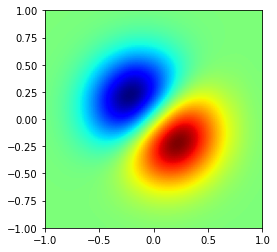

In [55]:
import pylab as py

def func(x,y):
    return (x+y)*np.exp(-5*(x**2+y**2))

x,y=np.mgrid[-1:1:15j, -1:1:15j]
fvals=func(x,y)

newfunc=interp2d(x,y,fvals,kind='cubic')

xx=np.linspace(-1,1,100)
yy=xx

fnew=newfunc(xx,yy)

# image plot
py.figure(1)
py.clf()
py.imshow(fnew,extent=[-1,1,-1,1], cmap=py.cm.jet)



# Miscellaneous Tools

[1.60849528] [5.32907052e-15]


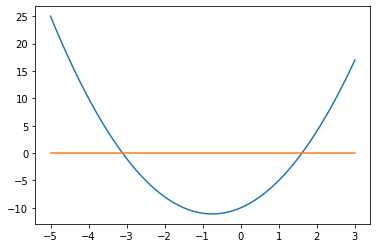

In [75]:
from scipy.optimize import fsolve

# fsolve useful for points of intersection

def quadratic(val):
    return 2*val**2+3*val-10
x=np.linspace(-5,3,100)
plt.plot(x,quadratic(x))
plt.plot(x, np.zeros(len(x)))

x=fsolve(quadratic,4) # fsolve(function,guess)
print(x, quadratic(x))

D_37:  POINT (1.785138818851461 0.37)


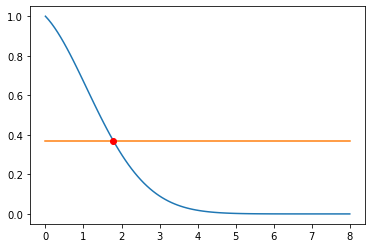

In [98]:
from shapely.geometry import LineString

def survival(a,b,x):
    return np.exp(-1*(a*x+b*x**2))
alpha=0.2
beta=0.2
dose=np.linspace(0,8,100)
y=survival(alpha,beta,dose)
yy=np.zeros(len(y))+0.37
plt.plot(dose,y)
plt.plot(dose,yy)

line_1=LineString(np.column_stack((dose,y)))
line_2=LineString(np.column_stack((dose,yy)))
intersection=line_1.intersection(line_2)

plt.plot(*intersection.xy, 'ro')

print("D_37: ", intersection)